In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
df=pd.read_csv("Algerian_forest_fires.csv",header=1)

In [112]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [113]:
df=df.iloc[:,:-1]

In [114]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 13 columns):
day            244 non-null float64
month          244 non-null float64
year           244 non-null float64
Temperature    244 non-null float64
 RH            244 non-null float64
 Ws            244 non-null float64
Rain           244 non-null float64
FFMC           244 non-null float64
DMC            244 non-null float64
DC             244 non-null object
ISI            244 non-null float64
BUI            244 non-null float64
FWI            244 non-null object
dtypes: float64(11), object(2)
memory usage: 25.2+ KB


In [116]:
#checking null values
df.isnull().sum()

day            3
month          3
year           3
Temperature    3
 RH            3
 Ws            3
Rain           3
FFMC           3
DMC            3
DC             3
ISI            3
BUI            3
FWI            3
dtype: int64

In [117]:
#dropping null values
df.dropna(how='any',axis=0,inplace=True) 

In [118]:
df[(df.DC == '14.6 9')]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
168,14.0,7.0,2012.0,37.0,37.0,18.0,0.2,88.9,12.9,14.6 9,12.5,10.4,fire


In [119]:
#removed because unable to parse string '14.6.9' in DC column
df.drop(168,inplace=True)

In [120]:
df["DC"] = pd.to_numeric(df["DC"], downcast="float")
df["FWI"] = pd.to_numeric(df["FWI"], downcast="float")

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 246
Data columns (total 13 columns):
day            243 non-null float64
month          243 non-null float64
year           243 non-null float64
Temperature    243 non-null float64
 RH            243 non-null float64
 Ws            243 non-null float64
Rain           243 non-null float64
FFMC           243 non-null float64
DMC            243 non-null float64
DC             243 non-null float32
ISI            243 non-null float64
BUI            243 non-null float64
FWI            243 non-null float32
dtypes: float32(2), float64(11)
memory usage: 24.7 KB


In [122]:
df.describe() #checking outliers

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430847,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665600,4.154234,14.228421,7.440567
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.099998,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.099998,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.399994,19.000000,68.000000,31.100000


In [123]:
#EDA
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521


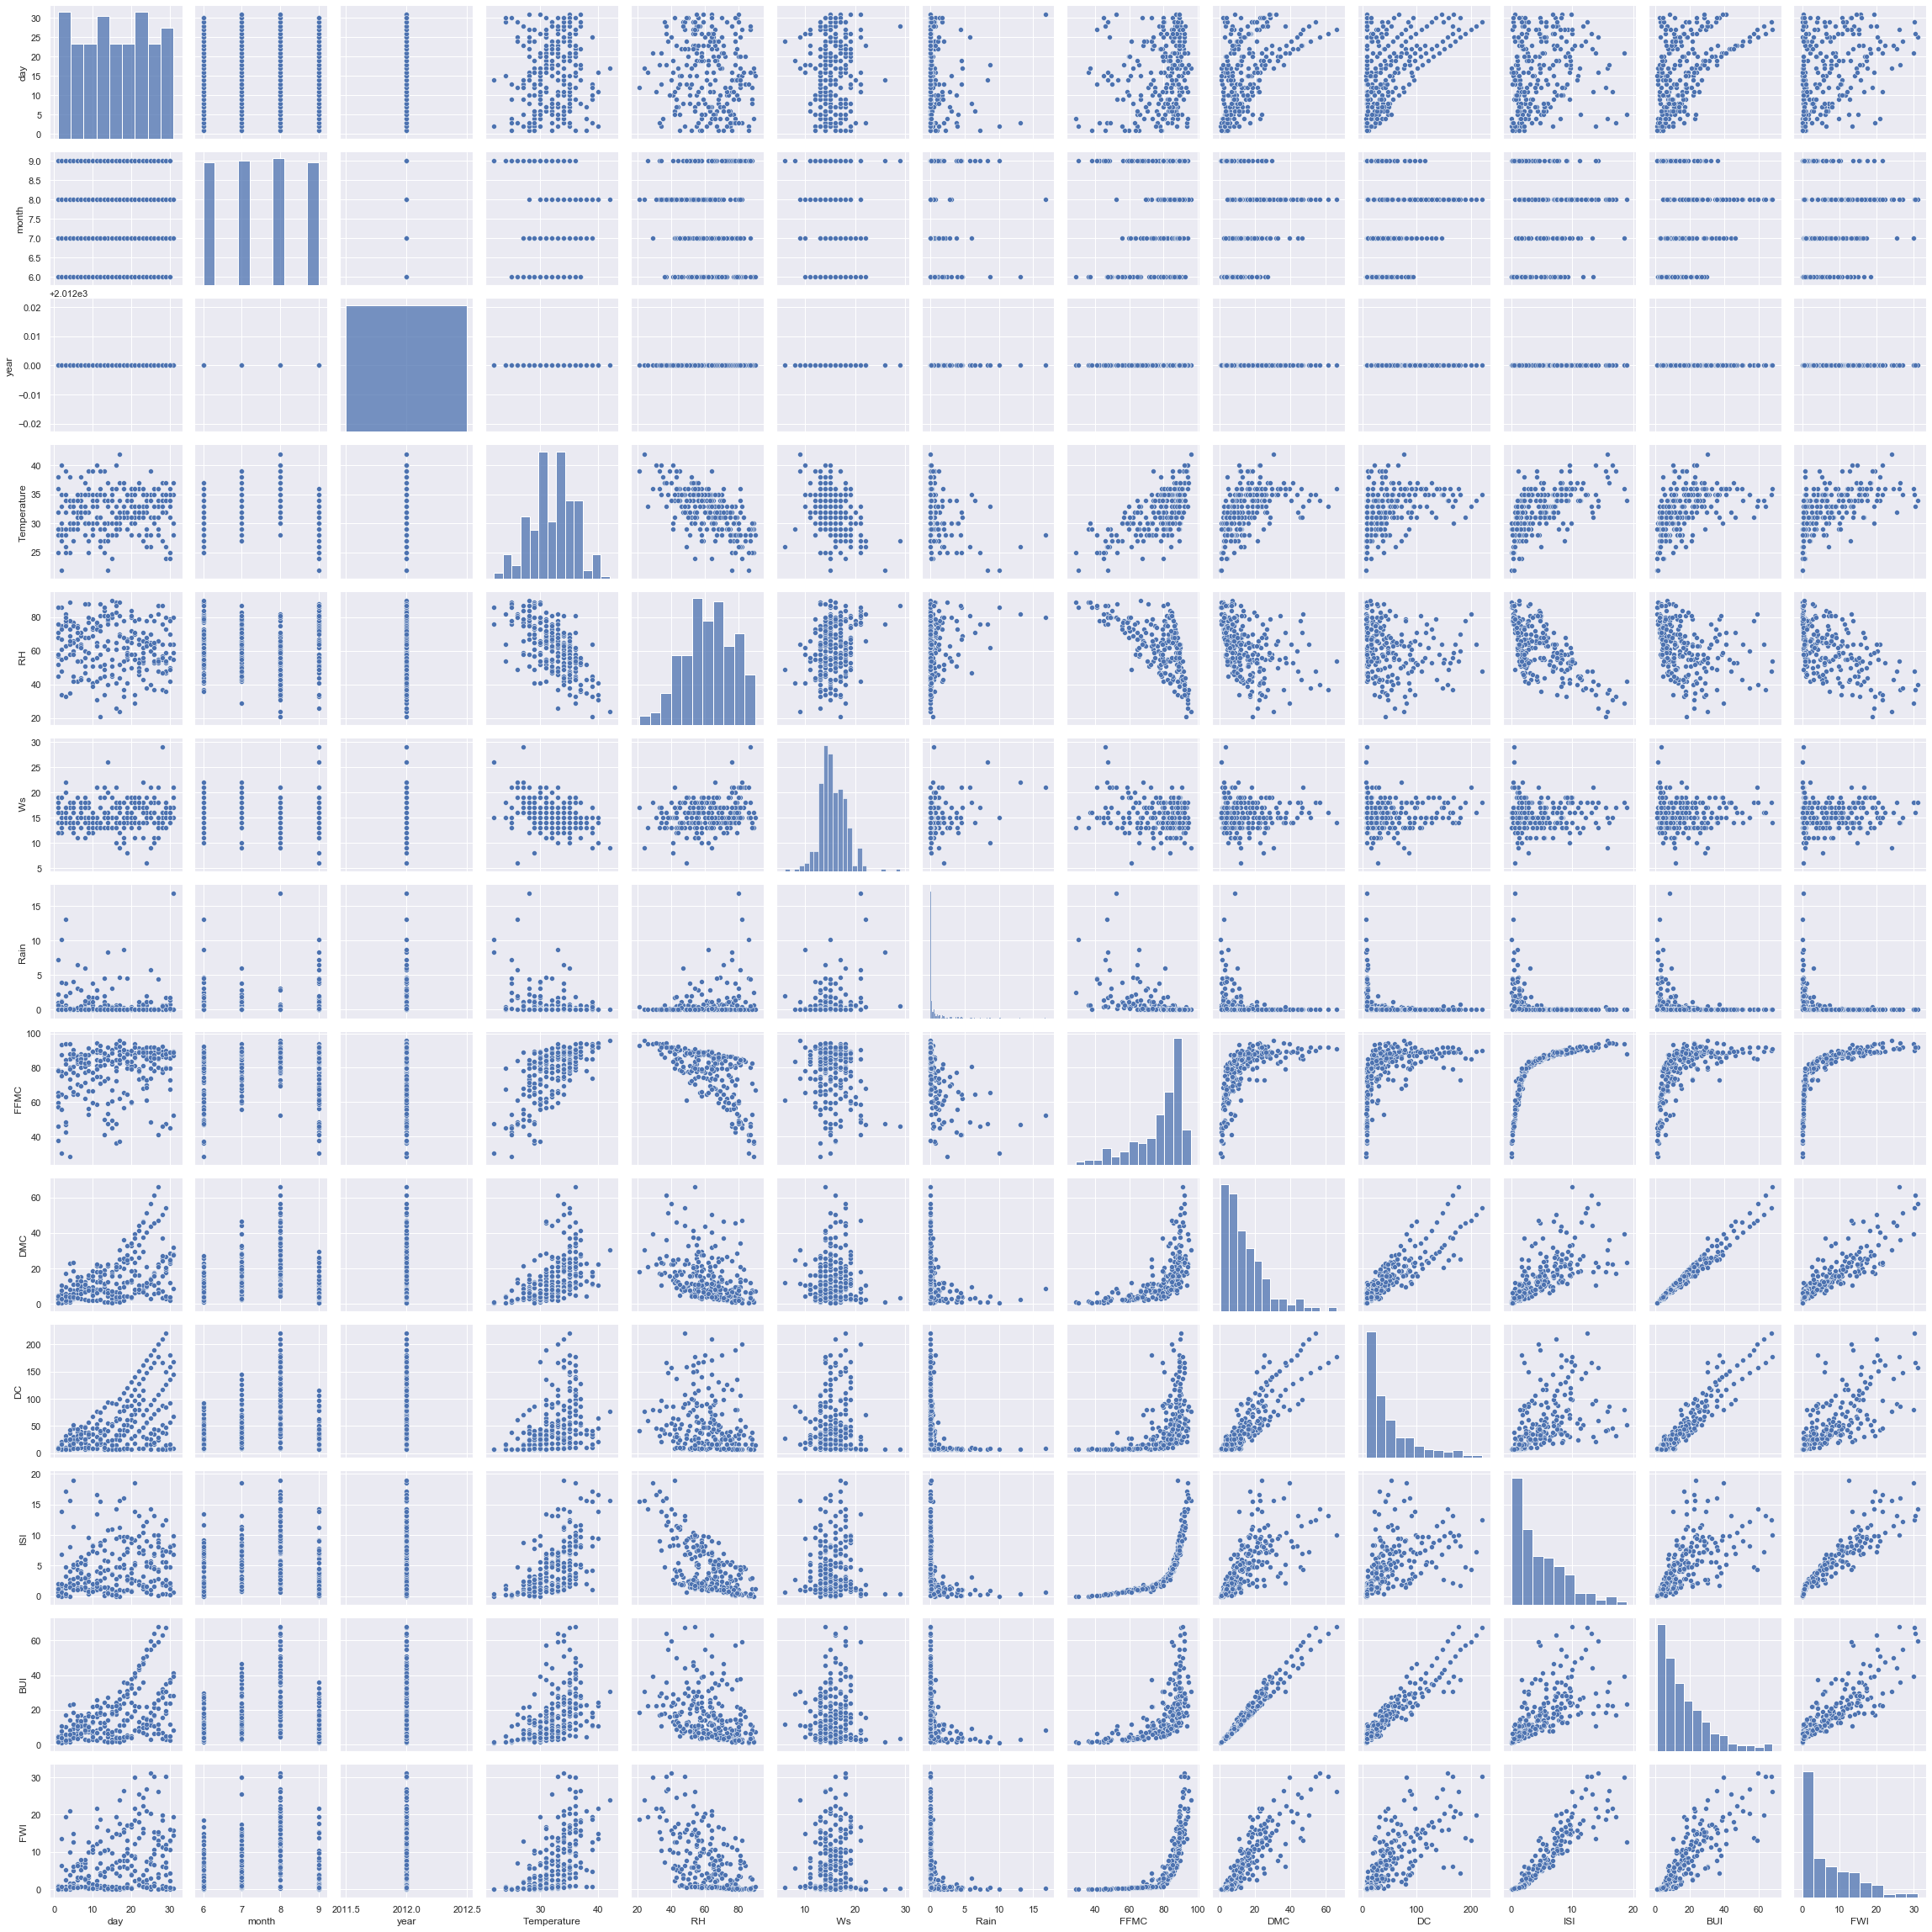

In [124]:
sns.pairplot(df)

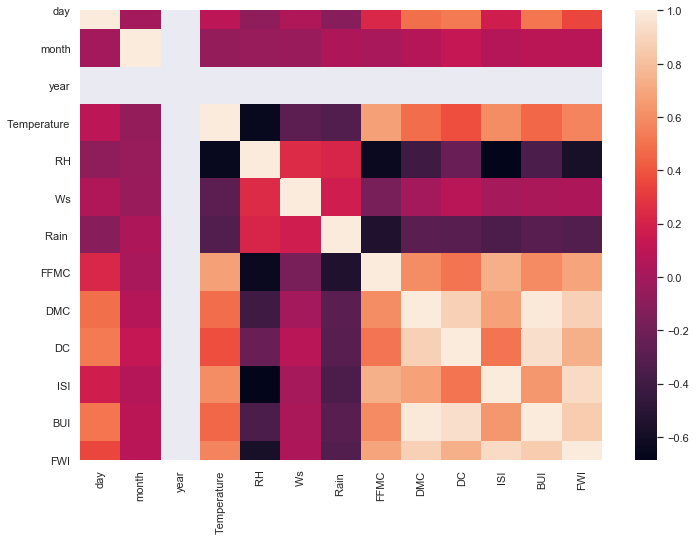

In [125]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr())

In [126]:
#dropping BUI and FWI as BUI have correlation with over 98% and FWI have corr with ISI over 92%  and year as its only 2012 data

In [127]:
df.drop(['BUI', 'FWI','year'], axis=1, inplace=True)

In [148]:
df.Temperature.shape

(243,)

In [129]:
#Independent and Dependent Features splitting for train test

In [152]:
x=df.iloc[:,[0,1,3,4,5,6,7,8,9]]
y=df.iloc[:,2]

In [153]:
x.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI
0,1.0,6.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3
1,2.0,6.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0
2,3.0,6.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3
3,4.0,6.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0
4,5.0,6.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2


In [154]:
y.shape

(243,)

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
 X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=10)

In [157]:
X_train.shape

(162, 9)

In [158]:
y_train.shape

(162,)

In [159]:
X_test.shape

(81, 9)

In [160]:
y_test.shape

(81,)

In [161]:
#Standardize or feature scaling the dataset

In [162]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [163]:
X_train=scaler.fit_transform(X_train)

In [164]:
X_test=scaler.transform(X_test)

In [165]:
X_train

array([[ 1.30705791, -1.39305207,  0.06835876, ...,  0.30584555,
         0.49028056,  0.48086219],
       [ 1.77217242,  1.29354835,  0.99672801, ..., -1.0428909 ,
        -0.86304801, -1.07139989],
       [ 0.95822202, -0.4975186 ,  0.53254338, ...,  2.74883987,
         1.0627616 ,  0.5286241 ],
       ...,
       [ 0.14427163,  1.29354835, -2.45150064, ...,  0.5942546 ,
         0.22508705,  2.27193383],
       [-1.2510719 , -1.39305207,  0.06835876, ..., -0.76296447,
        -0.69677593, -0.59378078],
       [-0.55340014, -1.39305207,  1.0630401 , ..., -0.39821185,
        -0.04642056, -0.80870938]])

## Model Training

In [169]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [170]:
regression.fit(X_train,y_train)

LinearRegression()

In [171]:
#print the coefficient and intercept
print(regression.coef_)

[-0.3646899  -0.20870274 -1.49068166 -0.72591189 -0.22082244  1.0091929
  0.29592935  0.46429577 -0.07644745]


In [172]:
print(regression.intercept_)

32.074074074074076


In [173]:
#prediction for test data

In [174]:
reg_pred=regression.predict(X_test)

In [175]:
reg_pred

array([32.04794991, 32.90311061, 33.24586216, 24.9620422 , 28.91679588,
       33.6171772 , 31.9303885 , 34.66525112, 31.5345693 , 32.75675126,
       33.52308796, 33.50876442, 35.61070454, 31.9600148 , 33.40639314,
       33.47977096, 26.67483315, 35.95259722, 33.35756771, 23.96546084,
       32.12232013, 32.51394991, 33.12559626, 32.8044056 , 30.11077385,
       32.55370187, 33.37920586, 32.06390981, 32.39281567, 33.95559411,
       34.7880793 , 33.56093243, 34.26971321, 32.84566522, 31.05767868,
       28.81861719, 32.58251237, 31.56962945, 33.13155202, 34.41679908,
       33.80715919, 35.459977  , 34.52340161, 37.03169239, 33.08135233,
       36.79450416, 32.23635112, 35.51527315, 30.45620247, 31.06303589,
       32.50688301, 39.34031255, 32.77968764, 34.88748717, 27.30298489,
       37.07717901, 33.73650337, 33.53540814, 28.79851772, 32.39389736,
       32.52602149, 32.27956855, 25.01796591, 36.41643387, 36.25921247,
       29.28271407, 29.43258919, 29.1853789 , 36.08148042, 28.65

In [176]:
#Assumption on linear regression

Text(0, 0.5, 'Test Predicted data ')

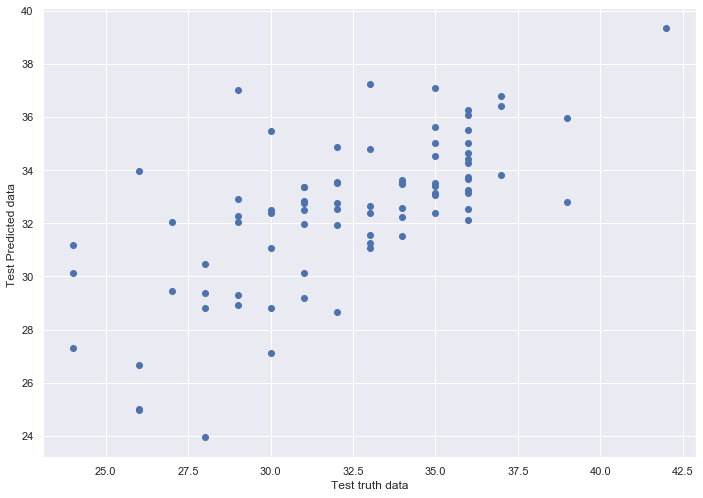

In [177]:
plt.scatter(y_test, reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Test Predicted data ")

In [178]:
#residual
residual=y_test - reg_pred

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


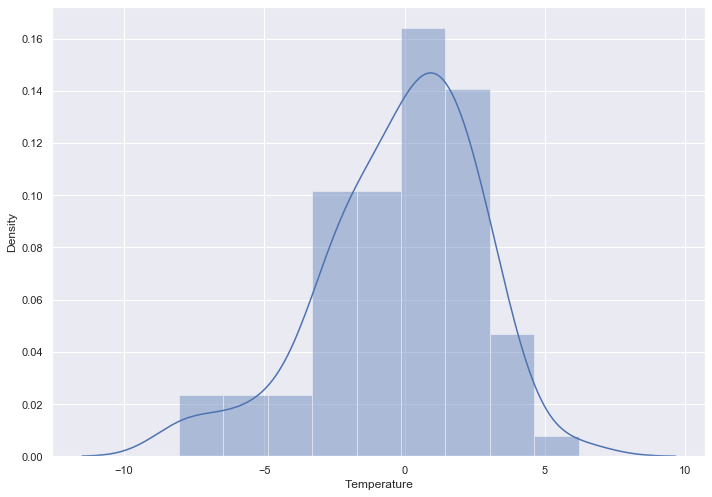

In [179]:
sns.distplot(residual)

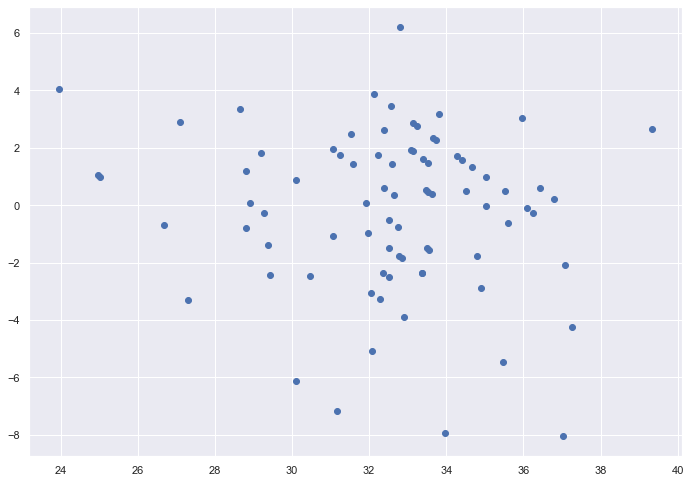

In [180]:
plt.scatter(reg_pred, residual)

In [181]:
# performance metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [182]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.628261657188083
2.1406771608775546
2.761930784286254


In [185]:
#R square and adjusted R square

In [183]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.44894494040329636


In [186]:
#Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3790928905952635